## **Projeto 1: tracking**

### **Descrição**

Esse projeto conta com um  conjunto de dados já **tratados e preparados para treinamento e estudos** que registra o comportamento de usuários em um site de venda de ingressos para um evento de inteligência artificial. 

Cada linha do arquivo CSV representa uma pessoa, e cada coluna indica, com **1 (sim)** ou **0 (não)**, se ela acessou uma das cinco páginas do site:
- página inicial
- palestras
- contato
- compra 
- patrocínio.

Nem todos os usuários começam pela página inicial, pois podem acessar diretamente links específicos, como o da página de contato.

As colunas, do conjunto de dados são **`inicial`**, **`palestra`**, **`contatos`**, **`comprou`** e **`patrocinio`**.

## **Objetivo**

O objetivo é `treinar` para tentar adivinhar **`se a pessoa vai ou não comprar`**, pois, se a pessoa `não for comprar`, o site poderia fazer aparecer no canto da página uma mensagem, como:

- "Olá! Gostaria de conversar conosco para entender se faz sentido você comprar o ingresso para o nosso evento?".

Essa ideia é muito interessante para o time de marketing e é importante mostrar esse anúncio somente se acharmos que a pessoa `não vai comprar`. Se ela vai comprar e exibimos um anúncio desse tipo na tela, podemos, inclusive, atrapalhar a navegação da pessoa. 
Portanto, é importante **`estimar se a pessoa vai comprar ou não`**.

### Carrega Dados

In [16]:
import pandas as pd
import numpy as np

# uri = "https://gist.githubusercontent.com/guilhermesilveira/b9dd8e4b62b9e22ebcb9c8e89c271de4/raw/c69ec4b708fba03c445397b6a361db4345c83d7a/tracking.csv"
dados = pd.read_csv('../Data/tracking.csv', sep=',')
dados.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [17]:
y = dados["comprou"]
x = dados[["inicial", "palestras",	"contato",	"patrocinio"]]
print(x.head())
print(y.head())

   inicial  palestras  contato  patrocinio
0        1          1        0           0
1        1          1        0           0
2        1          1        0           0
3        1          1        0           0
4        1          1        0           0
0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64


In [18]:
dados.shape

(99, 5)

### Separando Treino e Teste

In [19]:
from sklearn.model_selection import train_test_split

seed = 62

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=seed)

print(f"Treino com {len(treino_x)} elementos")
print(f"Teste com {len(teste_x)} elementos")

Treino com 74 elementos
Teste com 25 elementos


In [20]:
# treino_x[0:3][['inicial', 'palestras']]
treino_x.iloc[0:3, 0:2]

,inicial,palestras
95,1,1
33,1,0
48,1,1


### Treinando o modelo: LinearSVC

In [21]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(X = treino_x, y = treino_y)
previsoes = modelo.predict(teste_x) # previsões de 0 e 1
probs = modelo.decision_function(teste_x) # "probabilidade bruta" (na verdade é distância)

- O **LinearSVC** é baseado em SVM linear, mas não gera probabilidades diretamente.
- Ele gera pontuações de decisão (não probabilidades).
- Para pegar essas pontuações, você usa:

```
modelo.decision_function(teste_x)
```
Essa função (decision_function) retorna a distância até a fronteira de decisão:

- Valores positivos → indicam classe 1,
- Valores negativos → indicam classe 0,
- Quanto maior o valor absoluto → maior a confiança.

In [22]:
modelo.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [23]:
teste_x_previsoes = pd.DataFrame(data=teste_x)
teste_x_previsoes["previsao"] = previsoes
teste_x_previsoes["score"] = probs
teste_x_previsoes.head()

,inicial,palestras,contato,patrocinio,previsao,score
75,0,1,0,0,0,-2.379312
60,1,0,1,0,1,0.863576
61,0,1,0,0,0,-2.379312
77,0,1,0,0,0,-2.379312
29,0,0,1,1,0,-0.844814


### Avaliação do modelo: LinearSVC

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

confusion = confusion_matrix(y_true=teste_y, y_pred=previsoes)
confusion

array([[17,  0],
       [ 0,  8]])

In [25]:
acuracia = accuracy_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100

f1 = f1_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100

precision = precision_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100

recall = recall_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100


print(f"Acurácia: {acuracia:.2f}%")
print(f"F1: {f1:.2f}%")
print(f"Precisão: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(classification_report(y_true=teste_y, y_pred=previsoes))

Acurácia: 100.00%
F1: 100.00%
Precisão: 100.00%
Recall: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         8

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



### Treinando o modelo: SVC(probability=True) 

**Se precisamos de probabilidades, tem dois caminhos:**

1. Usar outro modelo que suporta predict_proba, como:

- LogisticRegression
- RandomForestClassifier
- GradientBoostingClassifier

Ou, se continuar com **SVM**, usar **SVC(probability=True) em vez de LinearSVC**.


In [26]:
from sklearn.svm import SVC
modelo_svm = SVC(probability=True)
modelo_svm.fit(treino_x, treino_y)
previsoes_svm = modelo_svm.predict(teste_x) # previsões de 0 e 1
probs_svm = modelo_svm.predict_proba(teste_x) 

print(previsoes_svm)
print(probs_svm)

[0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0]
[[0.93698205 0.06301795]
 [0.02376332 0.97623668]
 [0.93698205 0.06301795]
 [0.93698205 0.06301795]
 [0.93682577 0.06317423]
 [0.90790159 0.09209841]
 [0.93699349 0.06300651]
 [0.93682577 0.06317423]
 [0.02376332 0.97623668]
 [0.02376332 0.97623668]
 [0.93699349 0.06300651]
 [0.9368834  0.0631166 ]
 [0.02376332 0.97623668]
 [0.02376332 0.97623668]
 [0.02376332 0.97623668]
 [0.93698205 0.06301795]
 [0.93699349 0.06300651]
 [0.9368834  0.0631166 ]
 [0.9368834  0.0631166 ]
 [0.02376332 0.97623668]
 [0.9368834  0.0631166 ]
 [0.93699349 0.06300651]
 [0.93699349 0.06300651]
 [0.02376332 0.97623668]
 [0.93699349 0.06300651]]


In [27]:
teste_x_previsoes["previsao_svm"] = previsoes_svm
teste_x_previsoes["score_svm"] = probs_svm[:, 1] # pega a probabilidade de 1 (comprou)
teste_x_previsoes.head()

,inicial,palestras,contato,patrocinio,previsao,score,previsao_svm,score_svm
75,0,1,0,0,0,-2.379312,0,0.063018
60,1,0,1,0,1,0.863576,1,0.976237
61,0,1,0,0,0,-2.379312,0,0.063018
77,0,1,0,0,0,-2.379312,0,0.063018
29,0,0,1,1,0,-0.844814,0,0.063174


### Avaliando o modelo: SVC(probability=True) 

In [28]:
confusion = confusion_matrix(y_true=teste_y, y_pred=previsoes_svm)
confusion

array([[17,  0],
       [ 0,  8]])

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular as taxas de falso positivo e verdadeiro positivo
fpr, tpr, thresholds = roc_curve(y_true=teste_y, y_score=probs_svm[:, 1])

# Calcular a AUC (area sob a curva)
auc = roc_auc_score(y_true=teste_y, y_score=probs_svm[:, 1])
print(f"AUC: {auc:.2f}")

AUC: 1.00


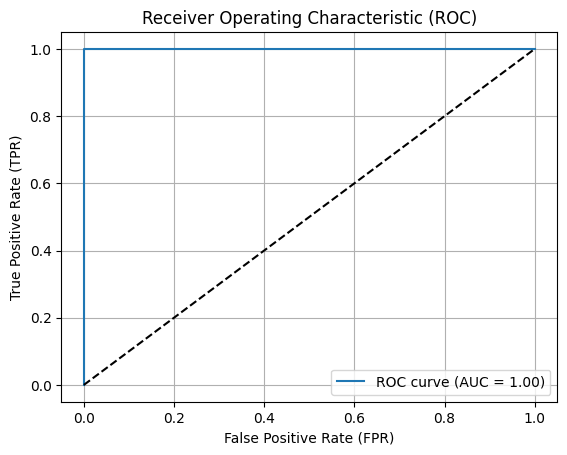

In [30]:
# Criar o gráfico
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # linha diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
